## Problem Statement

Predicting the house prices using the features in the data given

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [2]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df_s = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

### EDA

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data description:

- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property.
- LotArea: Lot size in square feet.
- Street: Type of road access to property.
- Alley: Type of alley access to property.
- LotShape: General shape of property.
- LandContour: Flatness of the property.
- Utilities: Type of utilities available.
- LotConfig: Lot configuration.
- LandSlope: Slope of property.
- Neighborhood: Physical locations within Ames city limits.
- Condition1: Proximity to various conditions.
- Condition2: Proximity to various conditions (if more than one is present).
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling.
- OverallQual: Rates the overall material and finish of the house.
- OverallCond: Rates the overall condition of the house.
- YearBuilt: Original construction date.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- RoofStyle: Type of roof.
- RoofMatl: Roof material.
- Exterior1st: Exterior covering on house.
- Exterior2nd: Exterior covering on house (if more than one material).
- MasVnrType: Masonry veneer type (None - None).
- MasVnrArea: Masonry veneer area in square feet.
- ExterQual: Evaluates the quality of the material on the exterior/
- ExterCond: Evaluates the present condition of the material on the exterior.
- Foundation: Type of foundation.
- BsmtQual: Evaluates the height of the basement (NA - No Basement).
- BsmtCond: Evaluates the general condition of the basement (NA - No Basement).
- BsmtExposure: Refers to walkout or garden level walls (NA - No Basement).
- BsmtFinType1: Rating of basement finished area (NA - No Basement).
- BsmtFinSF1: Type 1 finished square feet.
- BsmtFinType2: Rating of basement finished area (if multiple types) (NA - No Basement).
- BsmtFinSF2: Type 2 finished square feet.
- BsmtUnfSF: Unfinished square feet of basement area.
- TotalBsmtSF: Total square feet of basement area.
- Heating: Type of heating.
- HeatingQC: Heating quality and condition.
- CentralAir: Central air conditioning.
- Electrical: Electrical system.
- 1stFlrSF: First Floor square feet.
- 2ndFlrSF: Second floor square feet.
- LowQualFinSF: Low quality finished square feet (all floors).
- GrLivArea: Above grade (ground) living area square feet.
- BsmtFullBath: Basement full bathrooms.
- BsmtHalfBath: Basement half bathrooms.
- FullBath: Full bathrooms above grade.
- HalfBath: Half baths above grade.
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms).
- Kitchen: Kitchens above grade.
- KitchenQual: Kitchen quality.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Functional: Home functionality (Assume typical unless deductions are warranted).
- Fireplaces: Number of fireplaces.
- FireplaceQu: Fireplace quality (NA - No Fireplace).
- GarageType: Garage location (NA - No Garage).
- GarageYrBlt: Year garage was built.
- GarageFinish: Interior finish of the garage (NA - No Garage).
- GarageCars: Size of garage in car capacity.
- GarageArea: Size of garage in square feet.
- GarageQual: Garage quality (NA - No Garage).
- GarageCond: Garage condition (NA - No Garage).
- PavedDrive: Paved driveway.
- WoodDeckSF: Wood deck area in square feet.
- OpenPorchSF: Open porch area in square feet.
- EnclosedPorch: Enclosed porch area in square feet.
- 3SsnPorch: Three season porch area in square feet.
- ScreenPorch: Screen porch area in square feet.
- PoolArea: Pool area in square feet.
- PoolQC: Pool quality (NA - No Pool).
- Fence: Fence quality (NA - No Fence).
- MiscFeature: Miscellaneous feature not covered in other categories (NA - None).
- MiscVal: Value of miscellaneous feature.
- MoSold: Month Sold (MM).
- YrSold: Year Sold (YYYY).
- SaleType: Type of sale.
- SaleCondition: Condition of sale.

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_s.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [8]:
df_train.shape

(1460, 81)

In [9]:
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

##### Checking Null Values

In [10]:
null_values = df_train.isnull().sum()
null_values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
n_v = null_values[null_values>0]
n_v = n_v/df_train.shape[0]*100
n_v

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [12]:
n_v20 = (n_v[n_v>20])
n_v20

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

###### Droping the columns which is having more than 20% of null values in the data

In [13]:
df_train.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)
df_test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [14]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Visualization

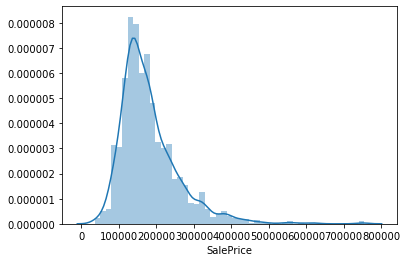

In [15]:
sns.distplot(df_train['SalePrice'])

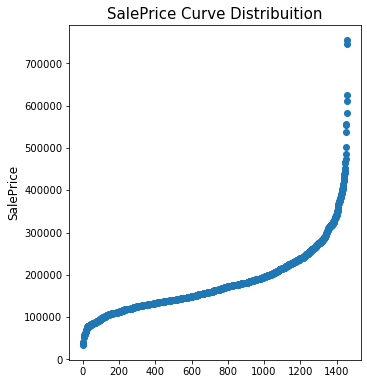

In [16]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
plot1 = plt.scatter(range(df_train.shape[0]), np.sort(df_train.SalePrice.values))
plot1 = plt.title("SalePrice Curve Distribuition", fontsize=15)
plot1 = plt.xlabel("")
plot1 = plt.ylabel("SalePrice", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,top = 0.9)
plt.show()

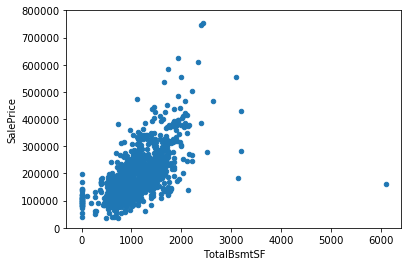

In [17]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

#### Checking Correlation

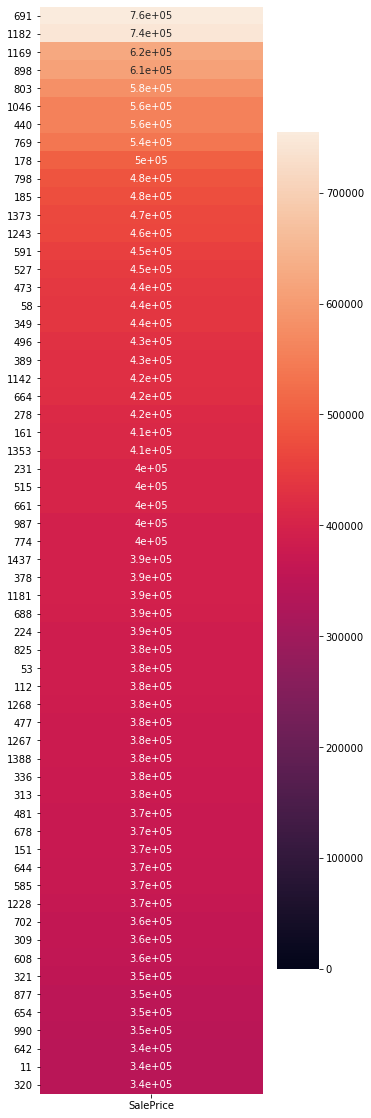

In [18]:
df_train.corr()
plt.figure(figsize=(5,20))
sns.heatmap(df_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(60),vmin=-1, annot=True)

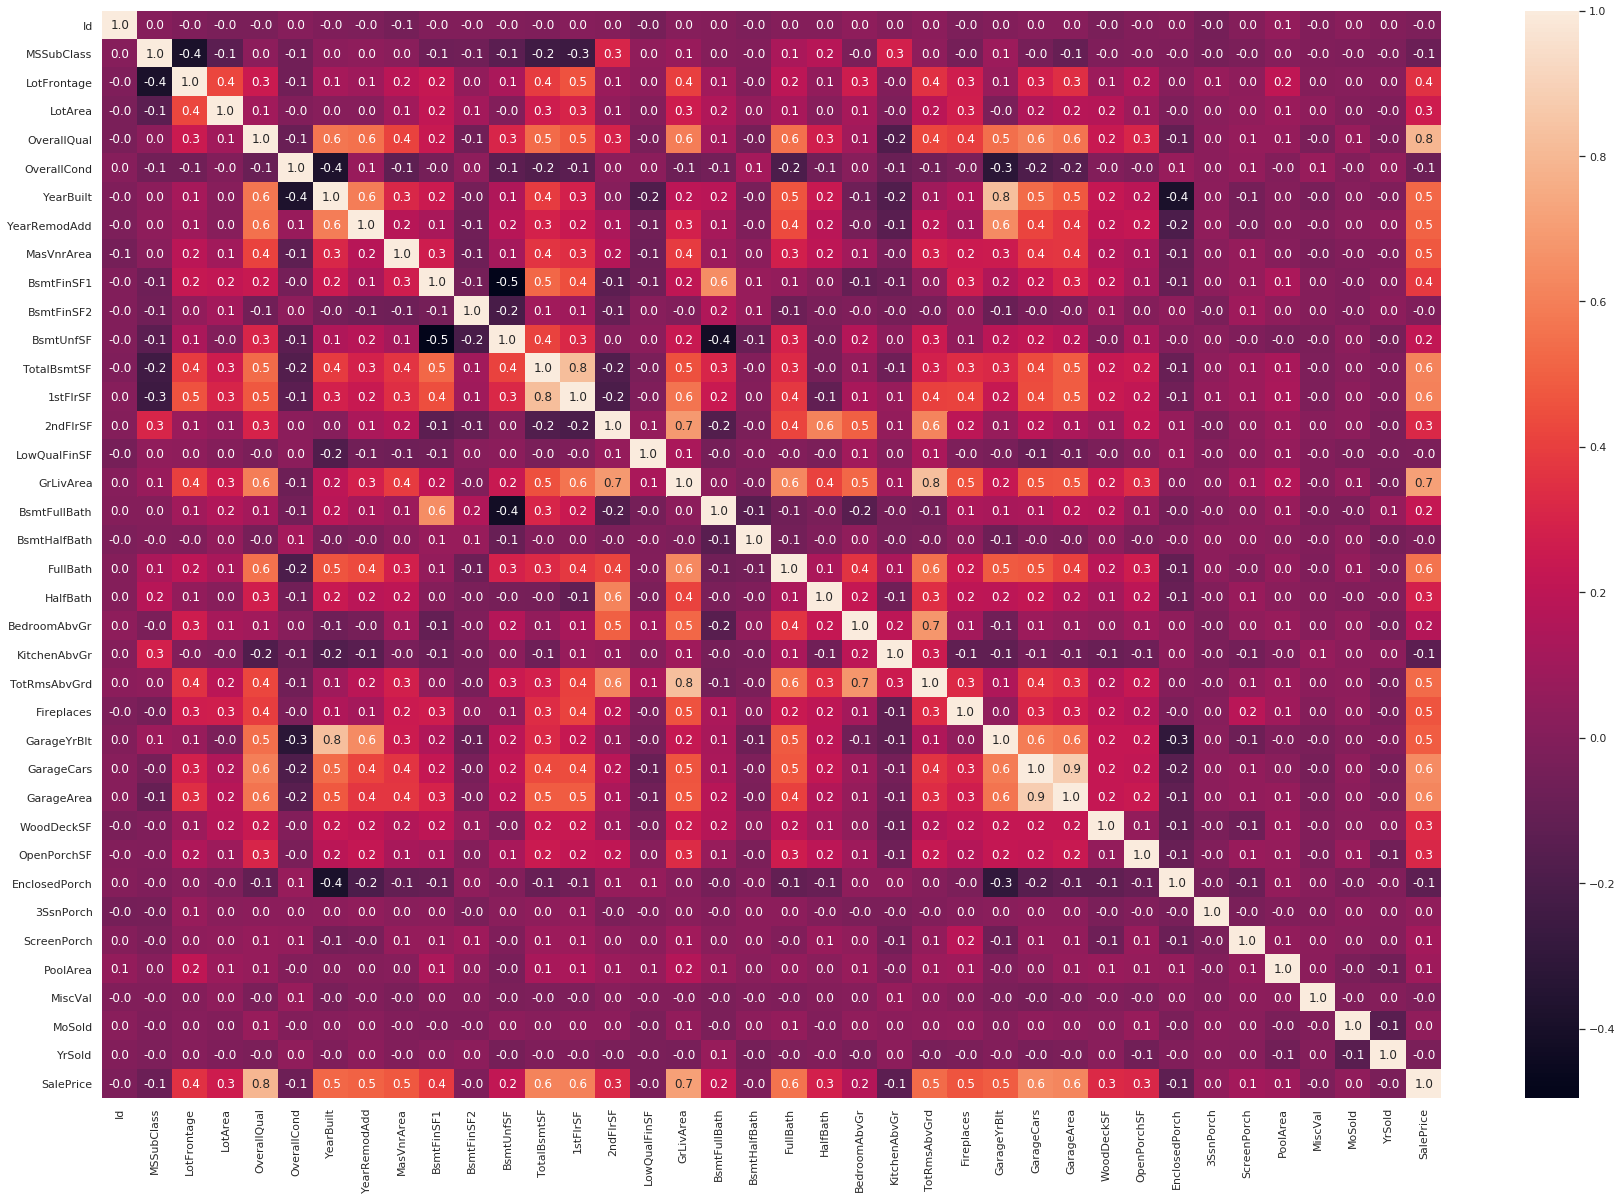

In [19]:
sns.set(font_scale=1)
correlation_train=df_train.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_train,annot=True,fmt='.1f')

In [20]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Droping the Categorical variables

In [21]:
df_train.drop(['Id', 'MSZoning', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
             'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl',
             'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
             'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC','CentralAir', 
             'Electrical', 'KitchenQual', 'Functional', 'GarageType','GarageFinish','GarageQual', 'GarageCond',
             'PavedDrive','SaleType','SaleCondition'], axis=1, inplace=True)

In [22]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
null_values_train = df_train.isnull().sum()
null_values_train

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

#### Imputation

In [25]:
df_train["LotFrontage"] = df_train['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [26]:
df_train["MasVnrArea"] = df_train['MasVnrArea'].transform(lambda x: x.fillna(x.mean()))

In [27]:
df_train["GarageYrBlt"] = df_train['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))

In [28]:
df_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [29]:
Id = df_test['Id']

In [30]:
df_test.drop(['Id', 'MSZoning', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
             'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl',
             'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
             'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC','CentralAir', 
             'Electrical', 'KitchenQual', 'Functional', 'GarageType','GarageFinish','GarageQual', 'GarageCond',
             'PavedDrive','SaleType','SaleCondition'], axis=1, inplace=True)

In [31]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [32]:
df_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [33]:
df_test.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [34]:
df_test["LotFrontage"] = df_test['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
df_test["MasVnrArea"] = df_test['MasVnrArea'].transform(lambda x: x.fillna(x.mean()))
df_test["GarageYrBlt"] = df_test['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))
df_test["BsmtFinSF1"] = df_test['BsmtFinSF1'].transform(lambda x: x.fillna(x.mean()))
df_test["BsmtFinSF2"] = df_test['BsmtFinSF2'].transform(lambda x: x.fillna(x.mean()))
df_test["BsmtUnfSF"] = df_test['BsmtUnfSF'].transform(lambda x: x.fillna(x.mean()))
df_test["TotalBsmtSF"] = df_test['TotalBsmtSF'].transform(lambda x: x.fillna(x.mean()))
df_test["BsmtFullBath"] = df_test['BsmtFullBath'].transform(lambda x: x.fillna(x.mean()))
df_test["BsmtHalfBath"] = df_test['BsmtHalfBath'].transform(lambda x: x.fillna(x.mean()))
df_test["GarageCars"] = df_test['GarageCars'].transform(lambda x: x.fillna(x.mean()))
df_test["GarageArea"] = df_test['GarageArea'].transform(lambda x: x.fillna(x.mean()))

In [35]:
df_test.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

### Model Building

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as MSE

In [37]:
X = df_train.drop(["SalePrice"],axis=1).values
y = df_train["SalePrice"].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=116214)

#### Linear Regression

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(f"Train score : {lr.score(X_train,y_train)}")
print(f"Validation score : {lr.score(X_test,y_test)}")

Train score : 0.8171313828059261
Validation score : 0.7867866220380362


In [41]:
Prediction_LR = lr.predict(df_test)

In [42]:
submission_LR = pd.DataFrame()
submission_LR['Id'] = Id
submission_LR['SalePrice'] = Prediction_LR
submission_LR.to_csv('submission_LR.csv', index=False)
submission_LR.head(5)

,Id,SalePrice
0,1461,111722.991433
1,1462,140782.712881
2,1463,171505.701365
3,1464,198167.384937
4,1465,193830.809592


#### SVM

In [43]:
SVM = SVR()
SVM.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
print(f"Train score : {SVM.score(X_train,y_train)}")
print(f"Validation score : {SVM.score(X_test,y_test)}")

Train score : -0.05312834025205637
Validation score : -0.07608740918532897


In [45]:
Prediction_SVM = SVM.predict(df_test)

In [46]:
submission_SVM = pd.DataFrame()
submission_SVM['Id'] = Id
submission_SVM['SalePrice'] = Prediction_SVM
submission_SVM.to_csv('submission_SVM.csv', index=False)
submission_SVM.head(5)

,Id,SalePrice
0,1461,161887.732739
1,1462,161901.027460
2,1463,161914.921583
3,1464,161872.005169
4,1465,161821.939589


#### DT

In [47]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [48]:
print(f"Train score : {DT.score(X_train,y_train)}")
print(f"Validation score : {DT.score(X_test,y_test)}")

Train score : 1.0
Validation score : 0.6871711709896733


In [49]:
Prediction_DT = DT.predict(df_test)

In [50]:
submission_DT = pd.DataFrame()
submission_DT['Id'] = Id
submission_DT['SalePrice'] = Prediction_DT
submission_DT.to_csv('submission_DT.csv', index=False)
submission_DT.head(5)

,Id,SalePrice
0,1461,133900.0
1,1462,145000.0
2,1463,230000.0
3,1464,173000.0
4,1465,212000.0


#### KNN

In [51]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [52]:
print(f"Train score : {KNN.score(X_train,y_train)}")
print(f"Validation score : {KNN.score(X_test,y_test)}")

Train score : 0.7776148302077349
Validation score : 0.6013863865123164


In [53]:
Prediction_KNN = KNN.predict(df_test)

In [54]:
submission_KNN = pd.DataFrame()
submission_KNN['Id'] = Id
submission_KNN['SalePrice'] = Prediction_KNN
submission_KNN.to_csv('submission_KNN.csv', index=False)
submission_KNN.head(5)

,Id,SalePrice
0,1461,148840.0
1,1462,207380.0
2,1463,220260.0
3,1464,193900.0
4,1465,151496.0


#### Random Forest

In [55]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
print(f"Train score : {RF.score(X_train,y_train)}")
print(f"Validation score : {RF.score(X_test,y_test)}")

Train score : 0.9773462143408964
Validation score : 0.8190891447245993


In [57]:
Prediction_RF = RF.predict(df_test)

In [58]:
submission_RF = pd.DataFrame()
submission_RF['Id'] = Id
submission_RF['SalePrice'] = Prediction_RF
submission_RF.to_csv('submission_RF.csv', index=False)
submission_RF.head(5)

,Id,SalePrice
0,1461,128743.08
1,1462,152839.00
2,1463,179717.16
3,1464,183238.00
4,1465,205412.52


In [59]:
param_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [60]:
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = param_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

In [61]:
RF_random.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [62]:
print(f"Train score : {RF_random.score(X_train,y_train)}")
print(f"Validation score : {RF_random.score(X_test,y_test)}")

Train score : 0.999999995649849
Validation score : 0.8132321464015627


In [63]:
Prediction_RF1 = RF_random.predict(df_test)

In [64]:
submission_RF1 = pd.DataFrame()
submission_RF1['Id'] = Id
submission_RF1['SalePrice'] = Prediction_RF1
submission_RF1.to_csv('submission_RF1.csv', index=False)
submission_RF1.head(5)

,Id,SalePrice
0,1461,126385.633333
1,1462,151596.250000
2,1463,180897.972222
3,1464,182972.161111
4,1465,191206.738889


In [65]:
param_grid_2 = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}

In [66]:
RF_grid = GridSearchCV(estimator = RF, param_grid = param_grid_2, cv = 10)

In [67]:
RF_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [68]:
print(f"Train score : {RF_grid.score(X_train,y_train)}")
print(f"Validation score : {RF_grid.score(X_test,y_test)}")

Train score : 0.9579175298704914
Validation score : 0.8182039403538364


In [69]:
Prediction_RF2 = RF_grid.predict(df_test)

In [70]:
submission_RF2 = pd.DataFrame()
submission_RF2['Id'] = Id
submission_RF2['SalePrice'] = Prediction_RF2
submission_RF2.to_csv('submission_RF2.csv', index=False)
submission_RF2.head(5)

,Id,SalePrice
0,1461,127741.975299
1,1462,149321.155136
2,1463,182723.358329
3,1464,184465.140219
4,1465,193428.815570


In [71]:
from catboost import Pool, CatBoostClassifier

In [72]:
CBR = CatBoostClassifier(iterations=100)

In [73]:
CBR.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 6.1593444	total: 3.87s	remaining: 6m 23s
1:	learn: 5.9832285	total: 6.33s	remaining: 5m 10s
2:	learn: 5.7901584	total: 8.7s	remaining: 4m 41s
3:	learn: 5.6264012	total: 10.9s	remaining: 4m 22s
4:	learn: 5.4574402	total: 14s	remaining: 4m 25s
5:	learn: 5.2928187	total: 17s	remaining: 4m 26s
6:	learn: 5.1452519	total: 20s	remaining: 4m 25s
7:	learn: 4.9864024	total: 23.3s	remaining: 4m 27s
8:	learn: 4.8398470	total: 25.9s	remaining: 4m 21s
9:	learn: 4.6977374	total: 28.7s	remaining: 4m 17s
10:	learn: 4.5471969	total: 31.6s	remaining: 4m 15s
11:	learn: 4.4180082	total: 33.7s	remaining: 4m 7s
12:	learn: 4.2865614	total: 36.1s	remaining: 4m 1s
13:	learn: 4.1586600	total: 38.4s	remaining: 3m 55s
14:	learn: 4.0193295	total: 41.4s	remaining: 3m 54s
15:	learn: 3.8965984	total: 43.8s	remaining: 3m 50s
16:	learn: 3.7789352	total: 46.4s	remaining: 3m 46s
17:	learn: 3.6787699	total: 48.7s	remaining: 3m 41s
18:	learn: 3.6005580	total: 50.8s	remaining: 3m 36s
19:	le

In [74]:
print('Accuracy of classifier on training set: {:.2f}'.format(CBR.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(CBR.score(X_test, y_test) * 100))

Accuracy of classifier on training set: 99.83
Accuracy of classifier on test set: 1.03


In [75]:
prediction_CBR = CBR.predict(df_test)

In [76]:
submission_CBR = pd.DataFrame()
submission_CBR['Id'] = Id
submission_CBR['SalePrice'] = prediction_CBR
submission_CBR.to_csv('submission_CBR.csv', index=False)
submission_CBR.head(5)

,Id,SalePrice
0,1461,137000
1,1462,160000
2,1463,175000
3,1464,190000
4,1465,153900
